Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [11]:
import sys

sys.path.append("../src/")

# Models
def get_ca_init_loc():
    # VDCC
    vdcc_loc = 2.35  # um

    return vdcc_loc


def get_ca_init_idx(n_space_pts):
    vdcc_loc = get_ca_init_loc()

    z = 4  # um
    dx = z / n_space_pts

    return int(vdcc_loc / dx)
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RunMultiruns import *
from utils.PlotMultiruns import PlotMultiRuns

In [12]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [13]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 10  # number of runs for multirun simulations (stochastic)

In [14]:
from utils.RunMultiruns import EMERunMultiruns

eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx
)

EME_RUN = eme.run_multi(make_dir=True)

rw = RWRunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx
)

RW_RUN = rw.run_multi(make_dir=True)

Made new directory: ../data/eme-validation/markov-eme/20240303_175842/
RUNNING SIMULATION 0
Made new directory: ../data/eme-validation/random-walk/20240303_175843/
RUNNING SIMULATION 0


n_runs: 10
start_loc: 0
n_particles: -0.048727958106796546
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


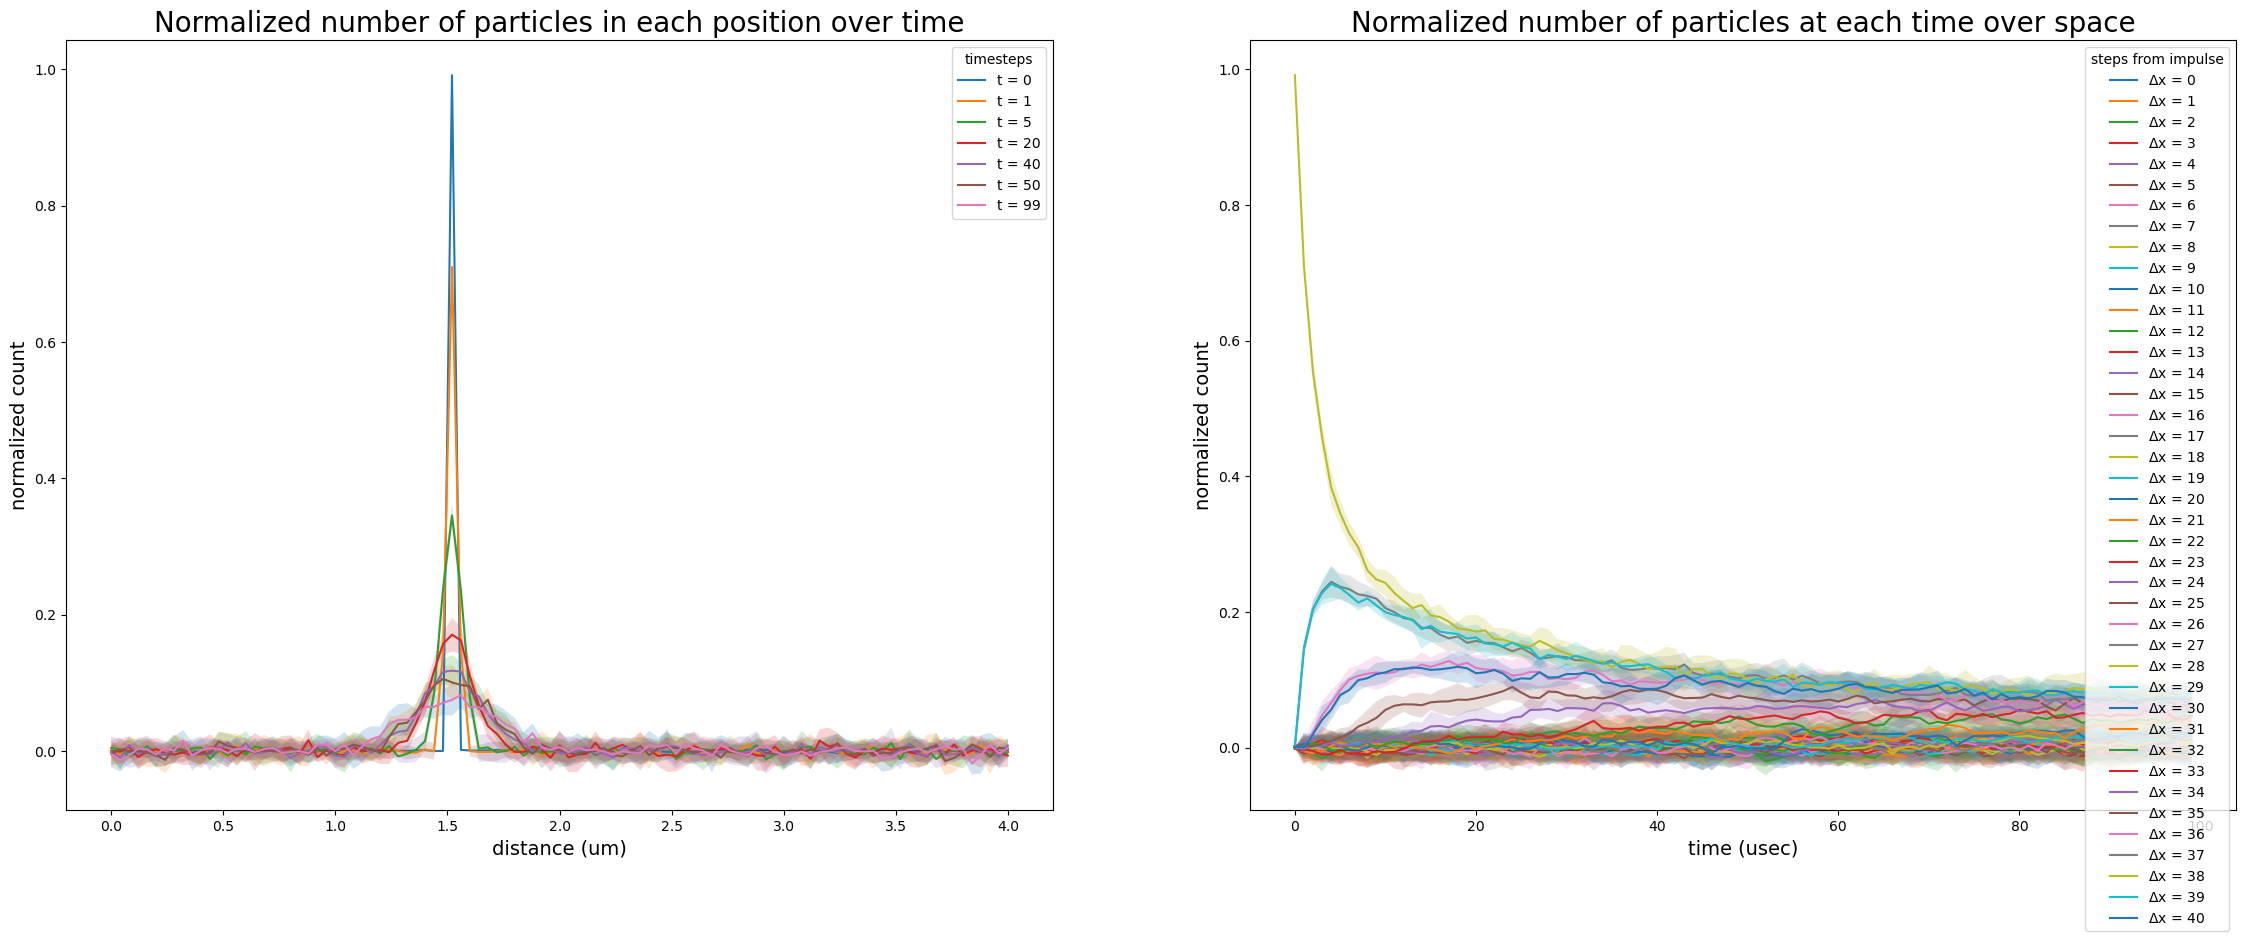

In [15]:
import utils.PlotMultiruns as pm

eme_plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/markov-eme/{EME_RUN}/",
    file_id="eme",
    eme_particles=n_particles
)

# plotter.plot_multiruns()
# TODO: debug multirun plot for EME -- giving impulse at boundary
# plotter.plot_multiruns_time([0, 99, 99])

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
eme_plotter.plot_multiruns_space(axis=ax2)
eme_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

n_runs: 10
start_loc: 59
n_particles: 1.0
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


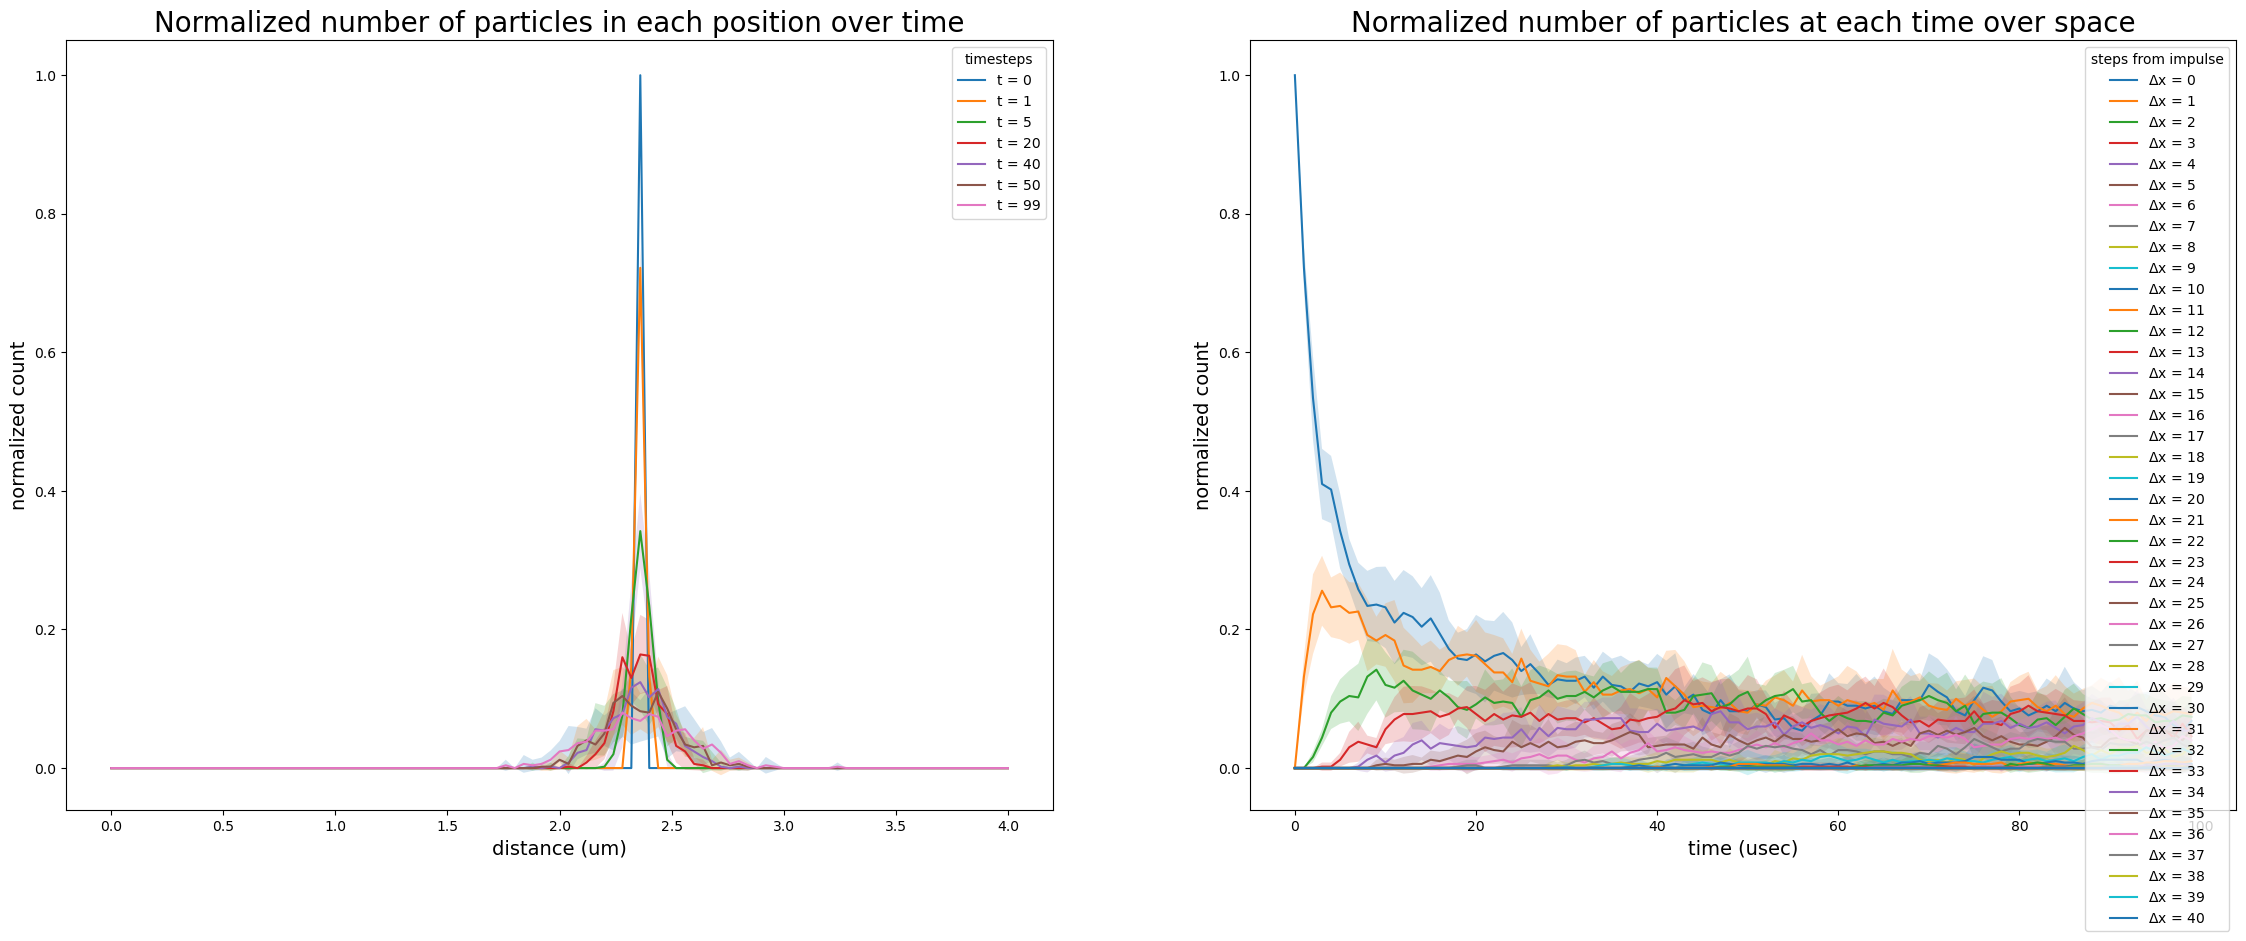

In [16]:
import utils.PlotMultiruns as pm

rw_plotter = pm.PlotMultiRuns(
    dir=f"../data/eme-validation/random-walk/{RW_RUN}/",
    file_id="rw",
    eme_particles=n_particles
)

# plotter.plot_multiruns()
# TODO: debug multirun plot for EME -- giving impulse at boundary
# plotter.plot_multiruns_time([0, 99, 99])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10)) 
rw_plotter.plot_multiruns_space(axis=ax2)
rw_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


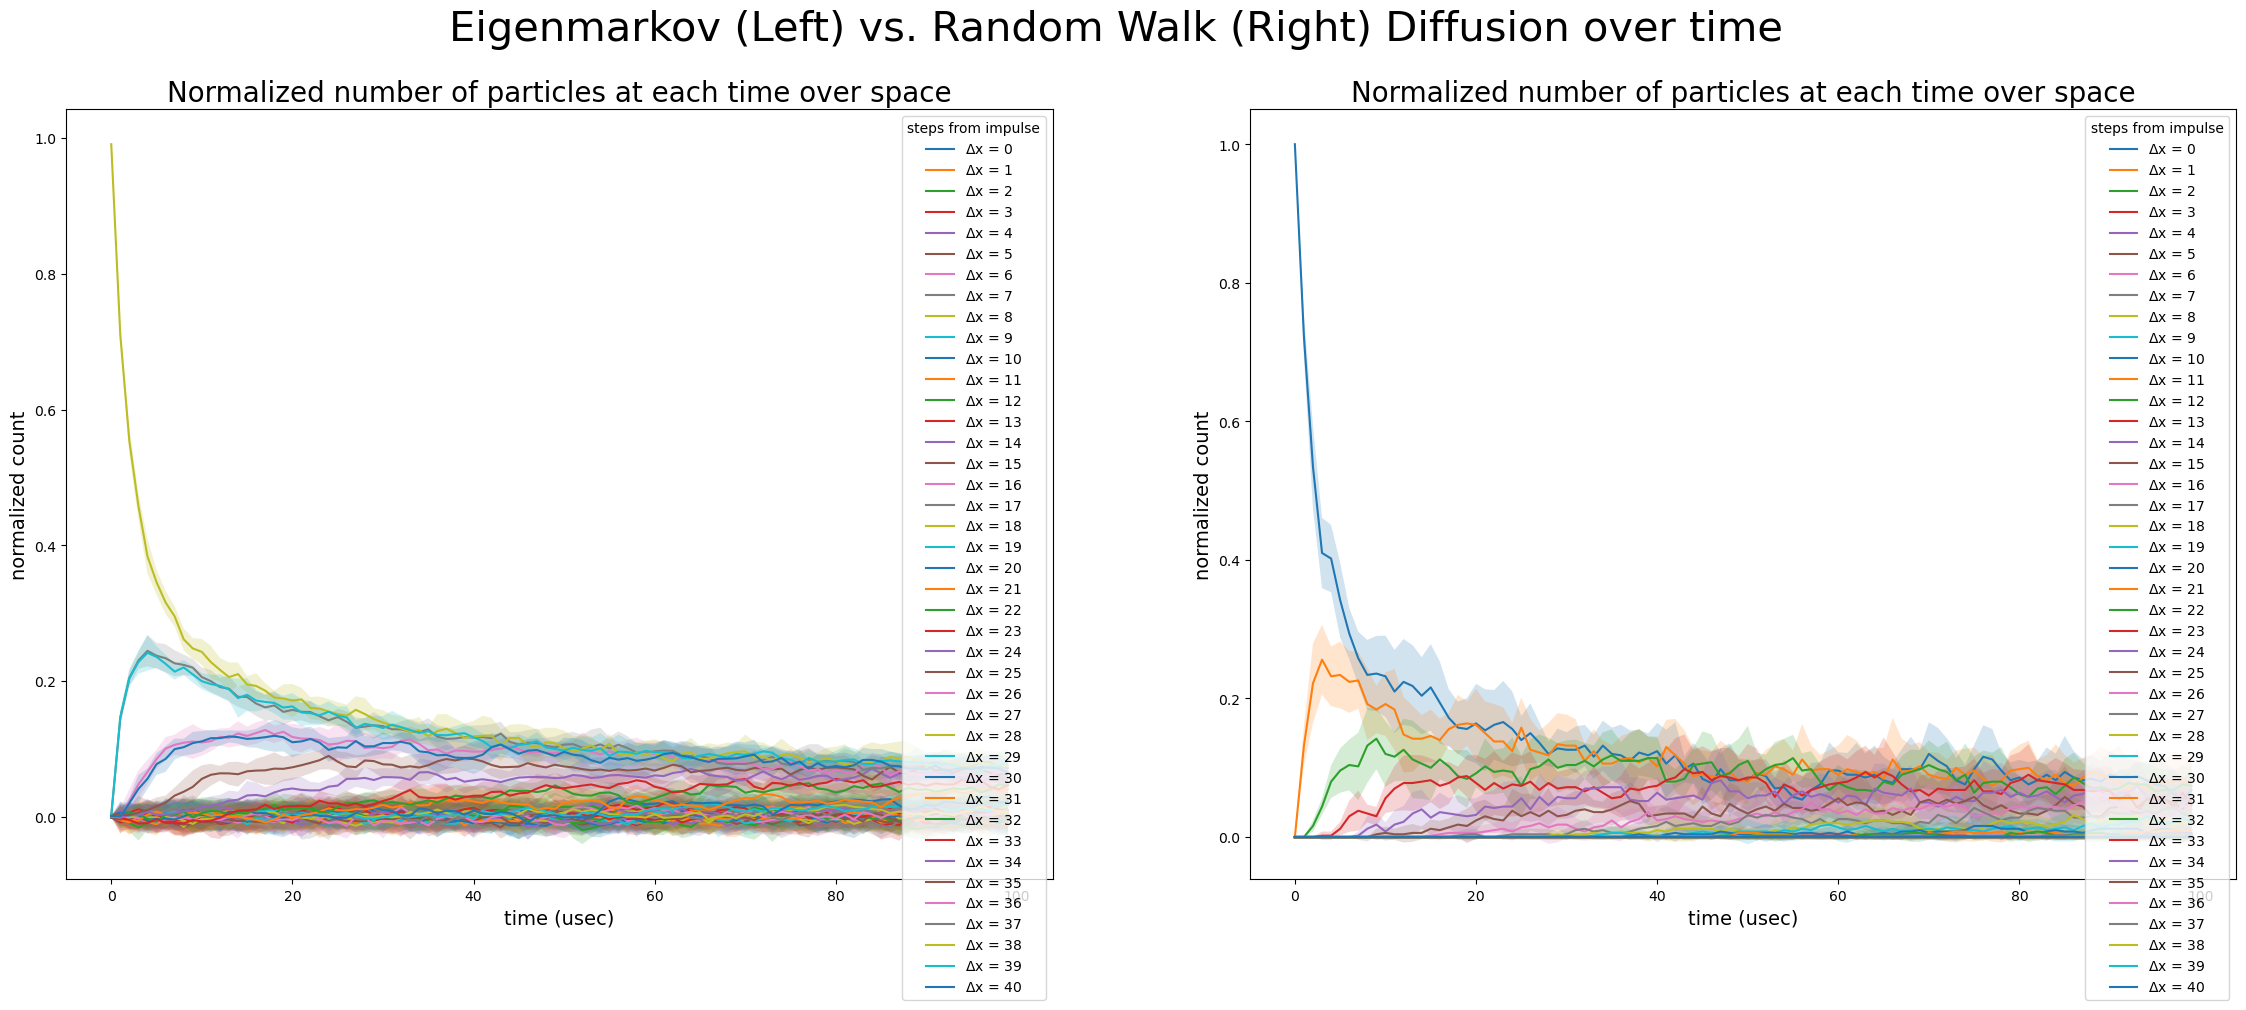

In [17]:
# Random Walk and EME side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over time", fontsize=30) 
rw_plotter.plot_multiruns_space(axis=ax2)
eme_plotter.plot_multiruns_space(axis=ax1)

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


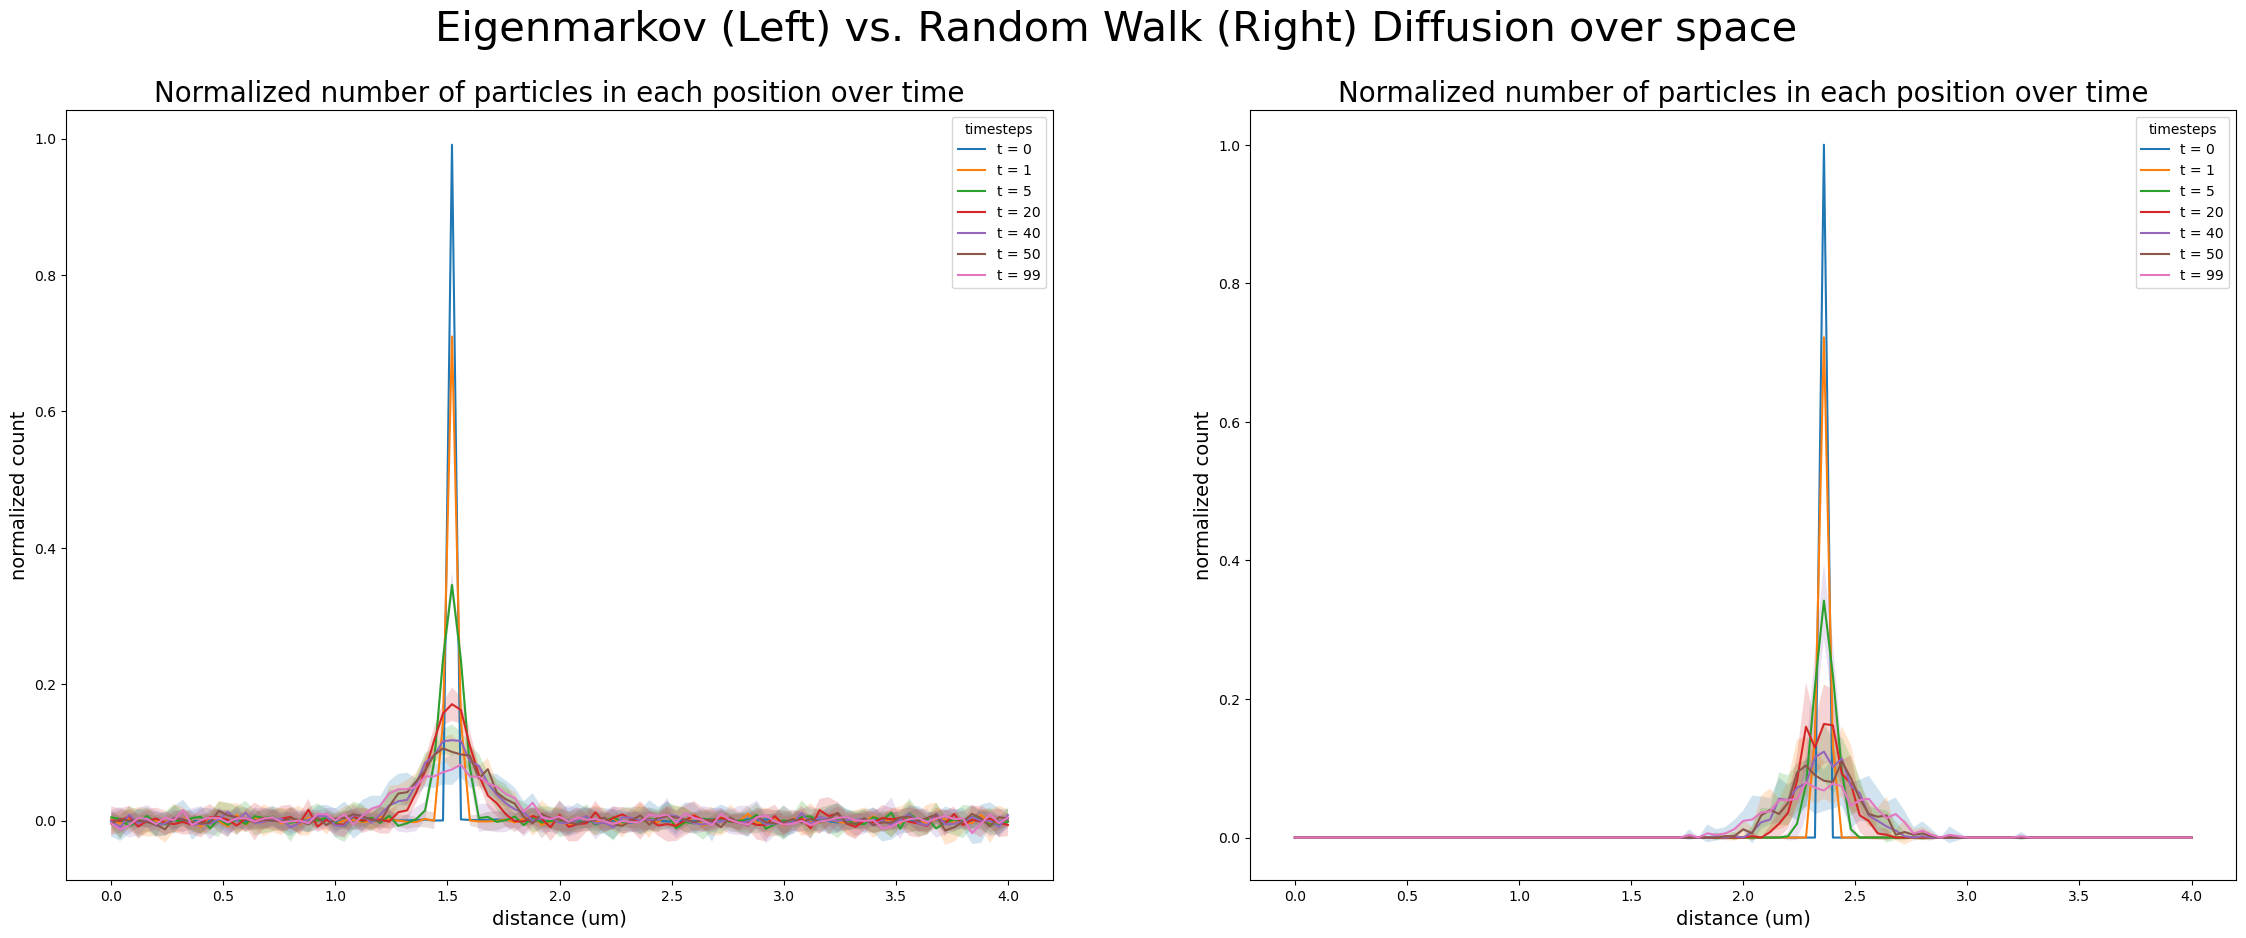

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 10))
plt.suptitle("Eigenmarkov (Left) vs. Random Walk (Right) Diffusion over space", fontsize=30) 
rw_plotter.plot_multiruns_time(axis=ax2,time=[0, 1, 5, 20, 40, 50, 99])
eme_plotter.plot_multiruns_time(axis=ax1,time=[0, 1, 5, 20, 40, 50, 99])

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


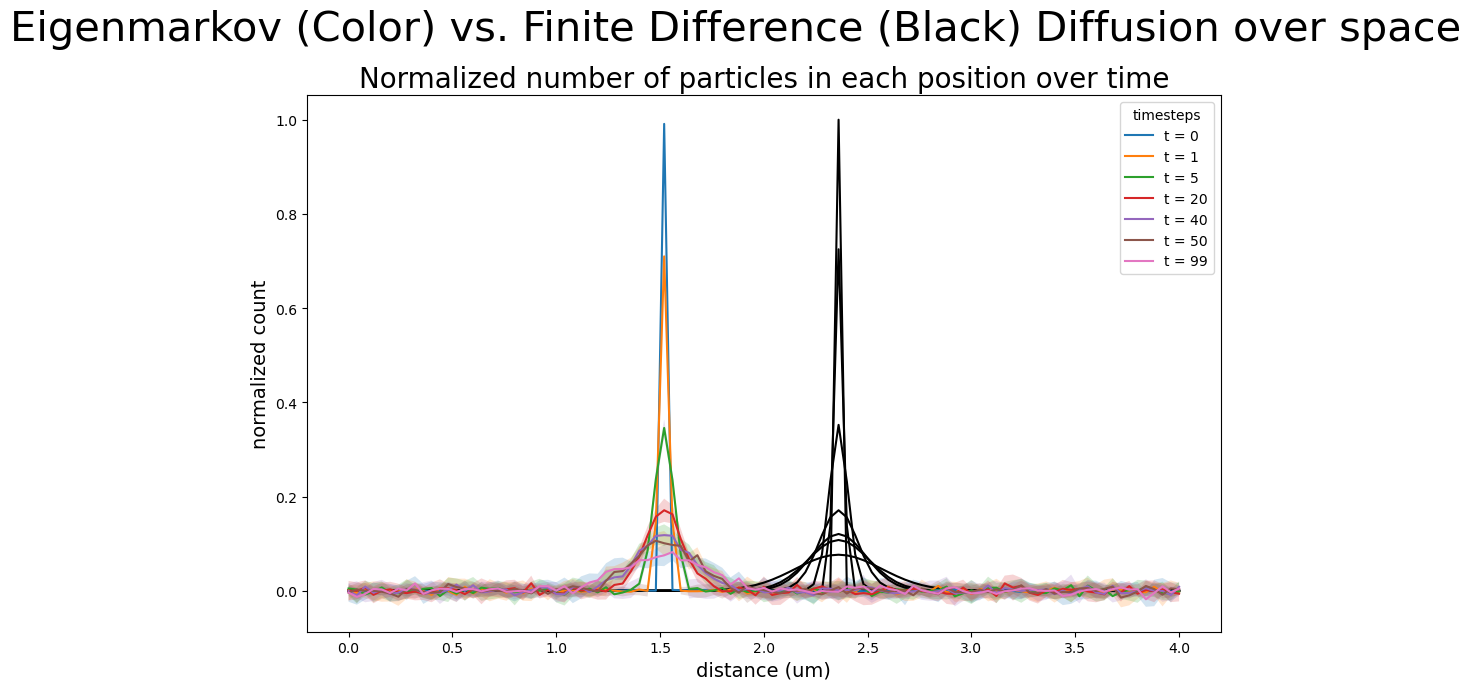

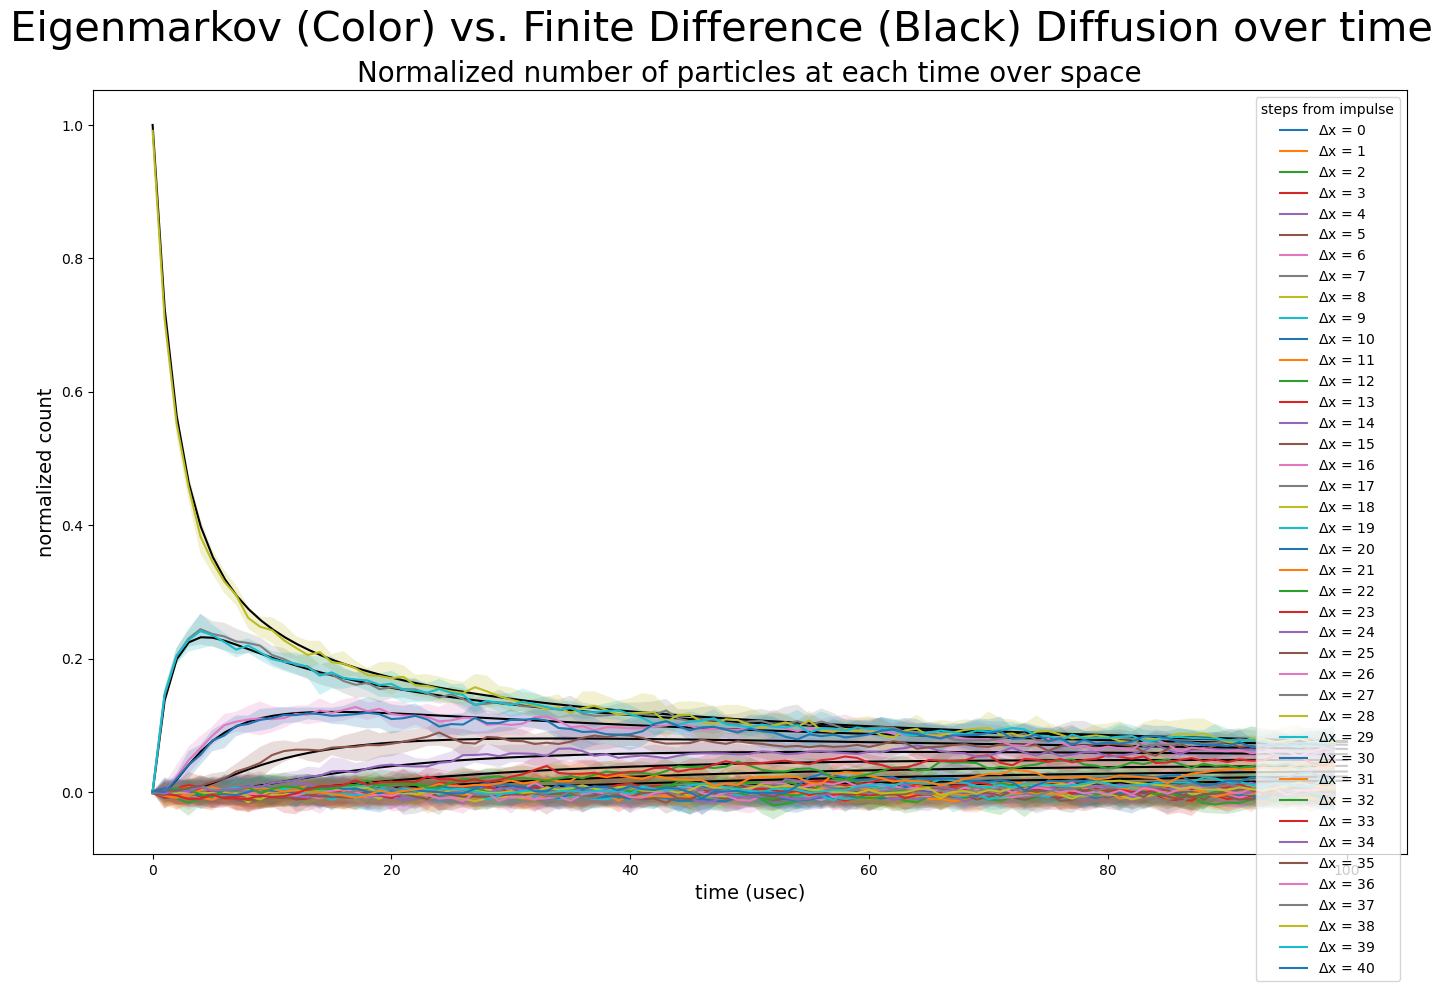

In [19]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)


fd.simulate_diffusion()
# fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])
fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over space", fontsize=30) 
eme_plotter.compare_overlap_time(time=[0, 1, 5, 20, 40, 50, 99], compare=fd, axis = axs)
plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Finite Difference (Black) Diffusion over time", fontsize=30) 
eme_plotter.compare_overlap_space(compare=fd, axis = axs)
plt.tight_layout()

Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...
Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


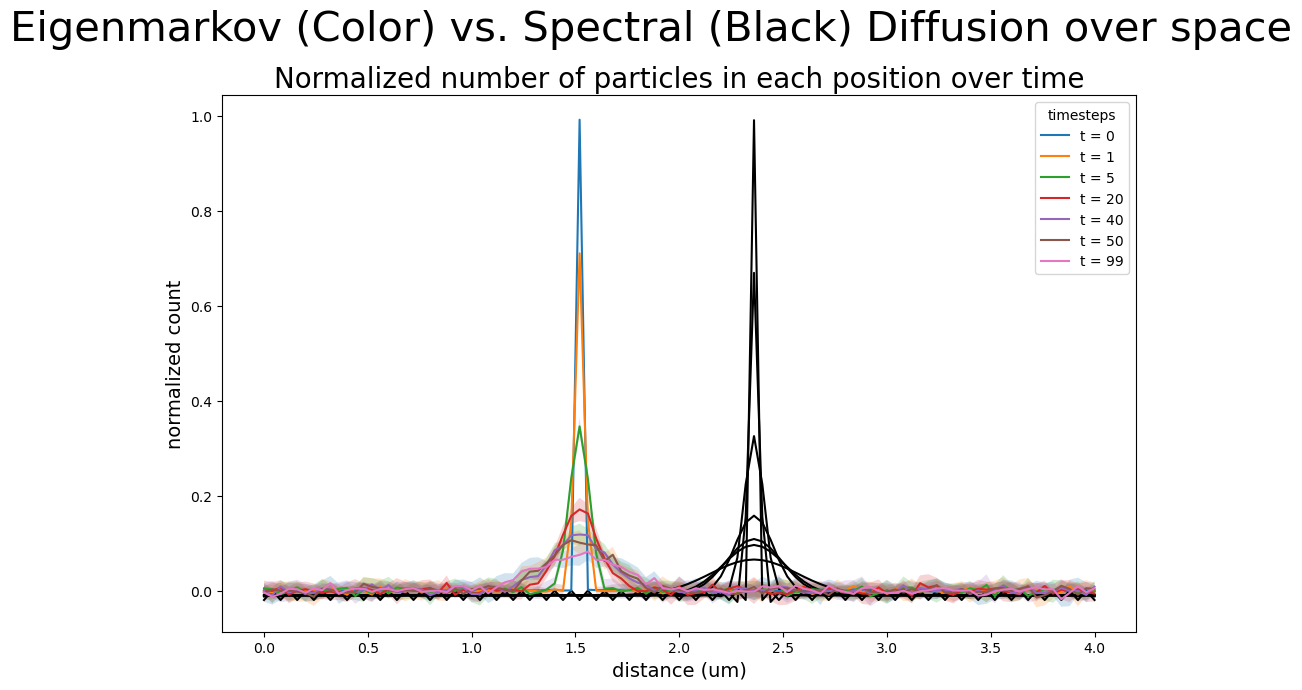

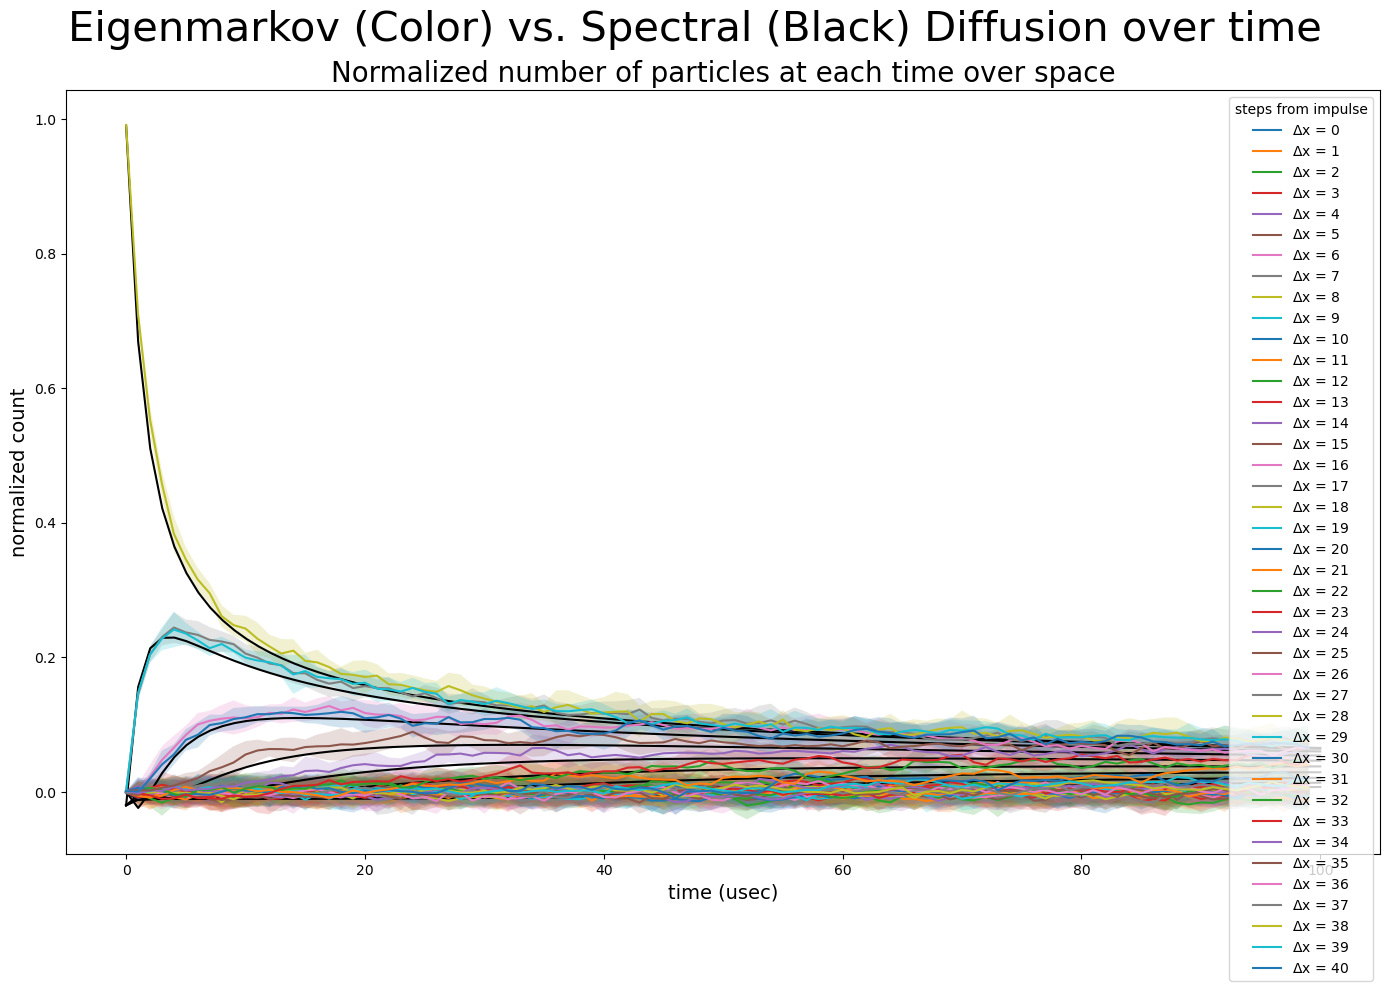

In [21]:
sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)
fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Spectral (Black) Diffusion over space", fontsize=30) 
sd.simulate_diffusion()
eme_plotter.compare_overlap_time(time=[0, 1, 5, 20, 40, 50, 99], compare=sd, axis = axs)
plt.tight_layout()

fig, axs = plt.subplots(1, 1, figsize=(14, 10), sharey=True)
plt.suptitle("Eigenmarkov (Color) vs. Spectral (Black) Diffusion over time", fontsize=30) 
eme_plotter.compare_overlap_space(compare=sd, axis = axs)
plt.tight_layout()